# Geopandas

[geopandas](https://geopandas.org/en/stable/) est devenu le point d'entrée à tout traitement lié aux coordonnées géographiques.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Coordonnées géographiques, et geocoding

In [2]:
import geopandas
import pandas

In [3]:
df = pandas.DataFrame(dict(name=["A", "B", "C", "D", "E"],
                           address=["50 rue du moulin 08000 Charleville-Mézières",
                                    "50 rue dumoulin 08000 Charleville-Mézières",
                                    "50 rue du moulin 08000 Charleville",
                                    "29 rue Ordener 75018 Paris",
                                    "Gare Lille"]))
df

,name,address
0,A,50 rue du moulin 08000 Charleville-Mézières
1,B,50 rue dumoulin 08000 Charleville-Mézières
2,C,50 rue du moulin 08000 Charleville
3,D,29 rue Ordener 75018 Paris
4,E,Gare Lille


In [4]:
from geopy.geocoders import Nominatim

In [5]:
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
res = geolocator.geocode("50 rue du moulin 08000 Charleville-Mézières")
res

Location(50, Rue du Moulin, Charleville-Mézières, Ardennes, Grand Est, France métropolitaine, 08000, France, (49.775247, 4.721863, 0.0))

In [6]:
res.latitude, res.longitude, res.point

(49.775247, 4.721863, Point(49.775247, 4.721863, 0.0))

In [7]:
coordinates = df['address'].apply(geolocator.geocode)

In [8]:
import numpy
from shapely.geometry import Point

df['position'] = [numpy.nan if c is None else 
                  Point(c.point.longitude, c.point.latitude) for c in coordinates]
df

,name,address,position
0,A,50 rue du moulin 08000 Charleville-Mézières,POINT (4.721863 49.775247)
1,B,50 rue dumoulin 08000 Charleville-Mézières,NaN
2,C,50 rue du moulin 08000 Charleville,POINT (4.721863 49.775247)
3,D,29 rue Ordener 75018 Paris,POINT (2.3539607 48.8906617)
4,E,Gare Lille,POINT (3.162718387293441 50.69456630000001)


In [9]:
geodf = geopandas.GeoDataFrame(df)

In [10]:
geodf

,name,address,position
0,A,50 rue du moulin 08000 Charleville-Mézières,POINT (4.721863 49.775247)
1,B,50 rue dumoulin 08000 Charleville-Mézières,NaN
2,C,50 rue du moulin 08000 Charleville,POINT (4.721863 49.775247)
3,D,29 rue Ordener 75018 Paris,POINT (2.3539607 48.8906617)
4,E,Gare Lille,POINT (3.162718387293441 50.69456630000001)


In [11]:
geodf.dropna()

,name,address,position
0,A,50 rue du moulin 08000 Charleville-Mézières,POINT (4.721863 49.775247)
2,C,50 rue du moulin 08000 Charleville,POINT (4.721863 49.775247)
3,D,29 rue Ordener 75018 Paris,POINT (2.3539607 48.8906617)
4,E,Gare Lille,POINT (3.162718387293441 50.69456630000001)


In [12]:
gdf = geodf.set_geometry('position')
gdf

,name,address,position
0,A,50 rue du moulin 08000 Charleville-Mézières,POINT (4.72186 49.77525)
1,B,50 rue dumoulin 08000 Charleville-Mézières,None
2,C,50 rue du moulin 08000 Charleville,POINT (4.72186 49.77525)
3,D,29 rue Ordener 75018 Paris,POINT (2.35396 48.89066)
4,E,Gare Lille,POINT (3.16272 50.69457)


## Carte

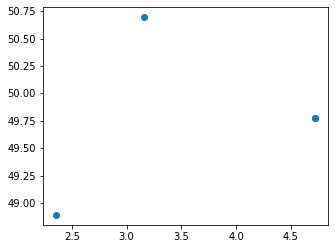

In [13]:
gdf.plot();

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

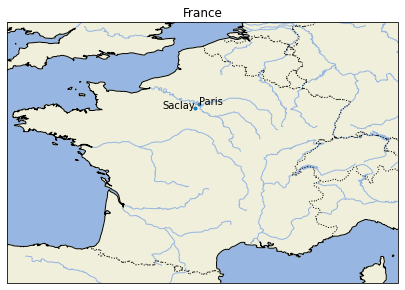

In [15]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.plot([2.35, 2.20], [48.85, 48.71], '.')
ax.text(2.35, 48.85, "Paris")
ax.text(2.20, 48.71, "Saclay", ha="right")
ax.set_title('France');

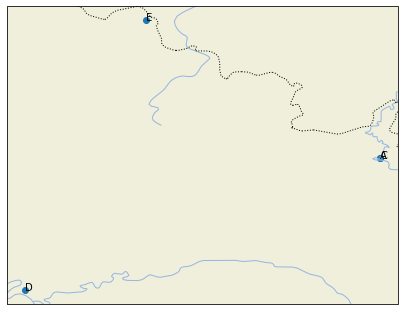

In [17]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = gdf.plot(ax=ax)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for i in range(gdf.shape[0]):
    if gdf.geometry[i] is None:
        continue
    ax.text(gdf.geometry[i].x, gdf.geometry[i].y, gdf.name[i])
ax;

## Régions administratives